<a href="https://colab.research.google.com/github/Sarosh09/DS-MAJOR-JAN/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

import fbprophet

In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/Major Project/owid-covid-data.csv")
df1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [11]:
df_world_total = df1[['location','date', 'total_cases']]
df_world_total

,location,date,total_cases
0,Afghanistan,2020-02-24,1.0
1,Afghanistan,2020-02-25,1.0
2,Afghanistan,2020-02-26,1.0
3,Afghanistan,2020-02-27,1.0
4,Afghanistan,2020-02-28,1.0
...,...,...,...
75066,Zimbabwe,2021-03-11,36377.0
75067,Zimbabwe,2021-03-12,36423.0
75068,Zimbabwe,2021-03-13,36471.0
75069,Zimbabwe,2021-03-14,36484.0


In [12]:
df_world_new = df1[['location','date','new_cases']]
df_world_new

,location,date,new_cases
0,Afghanistan,2020-02-24,1.0
1,Afghanistan,2020-02-25,0.0
2,Afghanistan,2020-02-26,0.0
3,Afghanistan,2020-02-27,0.0
4,Afghanistan,2020-02-28,0.0
...,...,...,...
75066,Zimbabwe,2021-03-11,36.0
75067,Zimbabwe,2021-03-12,46.0
75068,Zimbabwe,2021-03-13,48.0
75069,Zimbabwe,2021-03-14,13.0


In [13]:
india_total1 = df_world_total[(df_world_total["location"]=='India')]
india_total1

,location,date,total_cases
30843,India,2020-01-30,1.0
30844,India,2020-01-31,1.0
30845,India,2020-02-01,1.0
30846,India,2020-02-02,2.0
30847,India,2020-02-03,3.0
...,...,...,...
31249,India,2021-03-11,11308846.0
31250,India,2021-03-12,11333728.0
31251,India,2021-03-13,11359048.0
31252,India,2021-03-14,11385339.0


In [15]:
india_total = india_total1[['date', 'total_cases']]
india_total

,date,total_cases
30843,2020-01-30,1.0
30844,2020-01-31,1.0
30845,2020-02-01,1.0
30846,2020-02-02,2.0
30847,2020-02-03,3.0
...,...,...
31249,2021-03-11,11308846.0
31250,2021-03-12,11333728.0
31251,2021-03-13,11359048.0
31252,2021-03-14,11385339.0


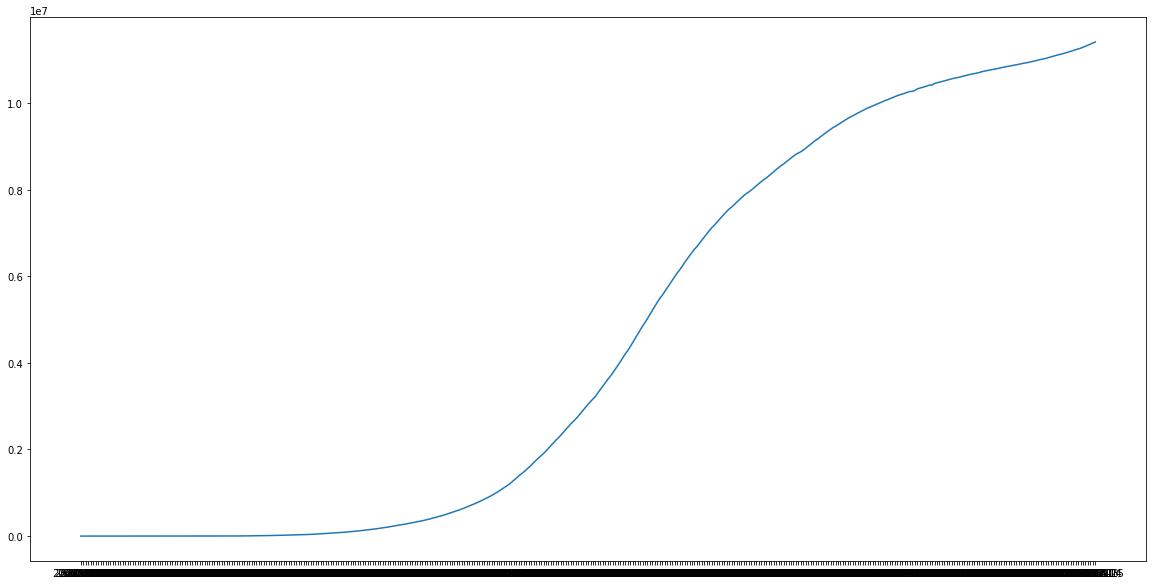

In [17]:
plt.figure(figsize=(20,10))
plt.plot(india_total['date'],india_total['total_cases'])
plt.show()

In [24]:
india_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 30843 to 31253
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         411 non-null    object 
 1   total_cases  411 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.6+ KB


In [26]:
india_total = india_total.rename(columns={'date':'ds', 'total_cases':'y'}, inplace=False)
india_total

,ds,y
30843,2020-01-30,1.0
30844,2020-01-31,1.0
30845,2020-02-01,1.0
30846,2020-02-02,2.0
30847,2020-02-03,3.0
...,...,...
31249,2021-03-11,11308846.0
31250,2021-03-12,11333728.0
31251,2021-03-13,11359048.0
31252,2021-03-14,11385339.0


In [27]:
india_total['ds'] = pd.to_datetime(india_total['ds'])
india_total['y'] = india_total['y'].astype(int)
india_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 30843 to 31253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      411 non-null    datetime64[ns]
 1   y       411 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.6 KB


In [56]:
total = fbprophet.Prophet(changepoint_prior_scale=0.01)
total.fit(india_total)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
india_new1 = df_world_new[(df_world_new["location"]=='India')]
india_new1

,location,date,new_cases
30843,India,2020-01-30,1.0
30844,India,2020-01-31,0.0
30845,India,2020-02-01,0.0
30846,India,2020-02-02,1.0
30847,India,2020-02-03,1.0
...,...,...,...
31249,India,2021-03-11,23285.0
31250,India,2021-03-12,24882.0
31251,India,2021-03-13,25320.0
31252,India,2021-03-14,26291.0


In [20]:
india_new = india_new1[['date', 'new_cases']]
india_new

,date,new_cases
30843,2020-01-30,1.0
30844,2020-01-31,0.0
30845,2020-02-01,0.0
30846,2020-02-02,1.0
30847,2020-02-03,1.0
...,...,...
31249,2021-03-11,23285.0
31250,2021-03-12,24882.0
31251,2021-03-13,25320.0
31252,2021-03-14,26291.0


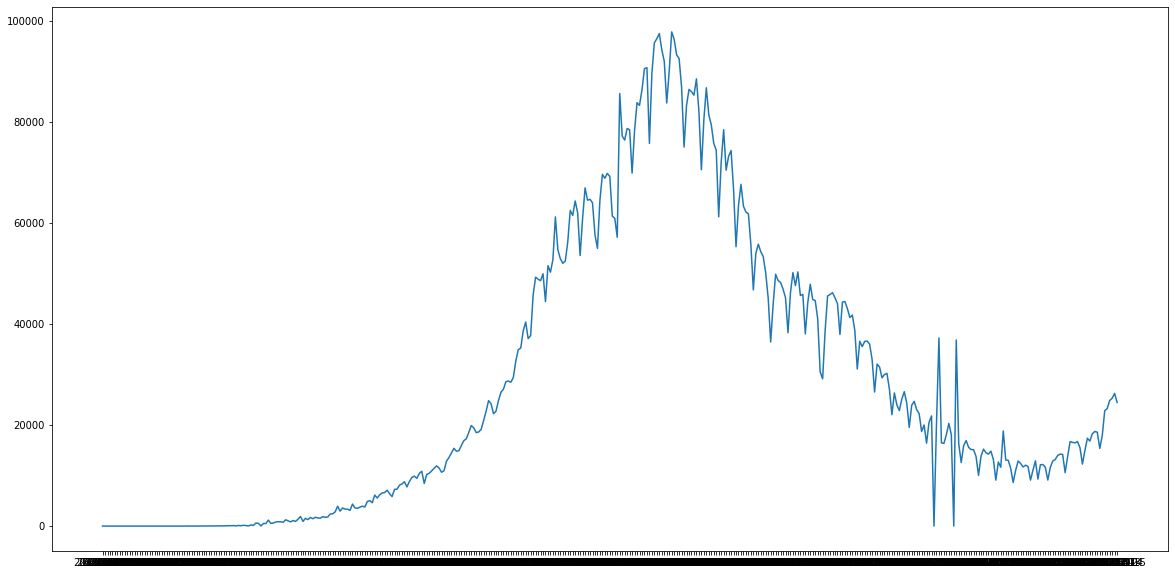

In [21]:
plt.figure(figsize=(20,10))
plt.plot(india_new['date'],india_new['new_cases'])
plt.show()

In [30]:
india_new = india_new.rename(columns={'date':'ds', 'new_cases':'y'}, inplace=False)
india_new

,ds,y
30843,2020-01-30,1.0
30844,2020-01-31,0.0
30845,2020-02-01,0.0
30846,2020-02-02,1.0
30847,2020-02-03,1.0
...,...,...
31249,2021-03-11,23285.0
31250,2021-03-12,24882.0
31251,2021-03-13,25320.0
31252,2021-03-14,26291.0


In [31]:
india_new['ds'] = pd.to_datetime(india_new['ds'])
india_new['y'] = india_new['y'].astype(int)
india_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 30843 to 31253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      411 non-null    datetime64[ns]
 1   y       411 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.6 KB


In [63]:
new = fbprophet.Prophet(changepoint_prior_scale=0.1)
new.fit(india_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
forecast_total = total.make_future_dataframe(periods= 6, freq='M')
forecast_total = total.predict(forecast_total)

In [58]:
forecast_total.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [64]:
forecast_new = new.make_future_dataframe(periods= 6, freq='M')
forecast_new = new.predict(forecast_new)

In [65]:
forecast_new.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

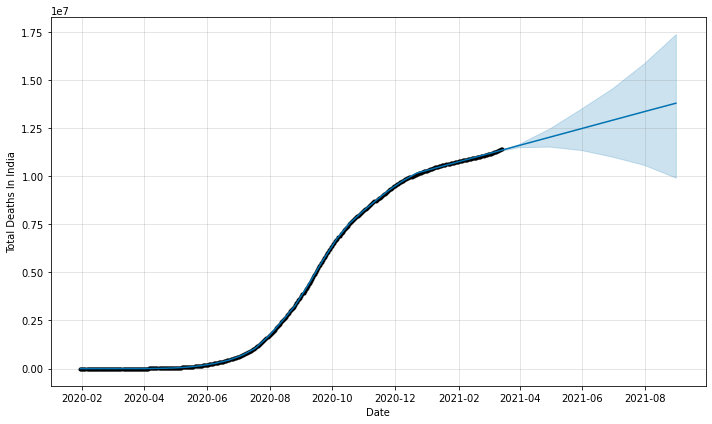

In [61]:
total.plot(forecast_total,xlabel='Date', ylabel='Total Deaths In India');

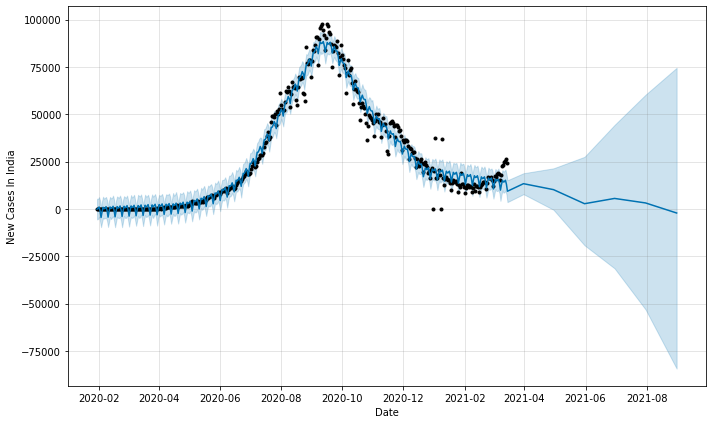

In [66]:
new.plot(forecast_new,xlabel='Date', ylabel='New Cases In India');